In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns


In [17]:
# Import data and describe
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/HW-Quiz/Data/diamonds_casestudy.csv')
diamonds.head(n=10)



,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39




*   Carat: Size
*   Cut: Brilliance: Ideal -> Premium -> Very Good -> Good -> Fair -> Poor
*   Clarity: Nubmer of natural flaws: IF (best) -> VVS1 -> VVS2 -> VS1 -> VS2 -> SI1 -> SI2 -> I1 (worst)
*   Color: Celar to yellow tint: D-F (clear- Colorless) -> G-J (near colorless), K-M (yellow tint)



In [19]:
#How many rows in the dataset, diamonds_casestudy.csv?
print(diamonds.shape)
print(len(diamonds))
diamonds.size


(53940, 10)
53940


539400

In [20]:
# Sort the diamonds by height first and then length.

diamonds.sort_values(by = ['price', 'carat'], ascending= [False, False])

# sort by price, then carat, in both descending order
# Give me the diamond in row #2

,carat,cut,color,clarity,depth,table,price,width,length,height
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
...,...,...,...,...,...,...,...,...,...,...
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [22]:
# boolean expression

#(diamonds.height > 5.43) & (diamonds["length"] > 9.5)

(diamonds.price > 20000) & (diamonds["carat"] > 2)

#diamonds['pirce'] >20000)

,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


In [25]:
#Count # of diamonds satisfying the conditions below:
((diamonds.price > 18000) & (diamonds["carat"] > 1.8)).sum()
# price > 20000 and carat size > 2

#((diamonds.height > 5.43) & (diamonds["length"] > 9.5)).sum()

#((diamonds.price > 5.43) & (diamonds["length"] > 9.5))

np.int64(260)

In [ ]:
#Count --> another way to find # of diamonds

expensive_dia = diamonds[(diamonds.price > 18700) & (diamonds["carat"] > 1.9)]

#large_dia = diamonds[ (diamonds.height > 5.43) & (diamonds["length"] > 9.5) ]
#arge_dia

expensive_dia


In [35]:
expensive_dia.shape

(33, 10)

In [36]:
# Calculate group means based on color

diamonds.groupby(by=['cut']).mean(numeric_only=True)

,carat,depth,table,price,width,length,height
cut,,,,,,,
Fair,1.046137,64.036839,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365436,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709344,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264177,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.817683,57.956150,3981.759891,5.740696,5.770026,3.559801


In [ ]:
# Calculate group sizes for color

diamonds.groupby(by=['color']).size()

,0
color,
D,6775
E,9797
F,9542
G,11292
H,8304
I,5422
J,2808


In [ ]:
# Pivot table with average price for color and clarity combinations

diamonds.pivot_table(values='price', index='color', columns='clarity', aggfunc=np.mean)

/tmp/ipython-input-660571147.py:3: FutureWarning: The provided callable <function mean at 0x7be0e0ff09a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  diamonds.pivot_table(values='price', index='color', columns='clarity', aggfunc=np.mean)


clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,3863.023810,8307.369863,2976.146423,3931.101460,3030.158865,2587.225692,2947.912698,3351.128391
E,3488.421569,3668.506329,3161.838005,4173.826036,2856.294301,2750.941700,2219.820122,2499.674067
F,3342.181818,2750.836364,3714.225716,4472.625233,3796.717742,3756.795093,2804.276567,3475.512821
G,3545.693333,2558.033774,3774.787449,5021.684109,4131.362197,4416.256498,2866.820821,3845.283437
H,4453.413580,2287.869565,5032.414945,6099.895074,3780.688623,4722.414486,1845.658120,2649.067434
I,4302.184783,1994.937063,5355.019663,7002.649123,4633.183992,5690.505560,2034.861972,2968.232877
J,5254.060000,3363.882353,5186.048000,6520.958246,4884.461255,5311.058824,4034.175676,5142.396947


## Structuring the diamonds data with python


In [ ]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

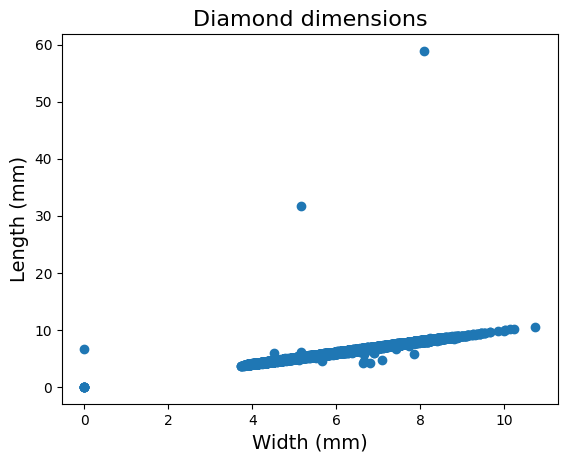

In [ ]:
# Scatterplot of width and length
plt.scatter(x=diamonds['width'], y=diamonds['length'])
plt.xlabel('Width (mm)', fontsize=14)
plt.ylabel('Length (mm)', fontsize=14)
plt.title('Diamond dimensions', fontsize=16)
plt.show()


## Cleaning the diamonds data with Python


In [ ]:
# Display the number of entries for each feature
diamonds.count()

,0
carat,53940
cut,53940
color,53940
clarity,53940
depth,53890
table,53940
price,53940
width,53940
length,53940
height,53940


In [ ]:
# Display the number of instances that have
# NA for each feature
diamonds.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,50
table,0
price,0
width,0
length,0
height,0


In [ ]:
diamonds.depth.isna().sum()

np.int64(50)

In [ ]:
# Replace missing values for depth with the mean
mean_depth_before_imputation = diamonds['depth'].mean()
print(mean_depth_before_imputation)

diamonds['depth'].fillna(value=mean_depth_before_imputation, inplace=True)
mean_depth_after_imputation = diamonds.depth.mean()
print(mean_depth_after_imputation)

# Note that mean_depth_before_imputation is almost same as (very close to)
# mean_depth_after_imputation


61.74889218778994
61.74889218778995


/tmp/ipython-input-533273626.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diamonds['depth'].fillna(value=mean_depth_before_imputation, inplace=True)


In [ ]:
# Import packages
from sklearn import preprocessing

In [ ]:
price_st_array = preprocessing.scale(diamonds.price)
price_st_array # note that the return valued by scale is an array!! not the dataframe!!

array([-0.90409516, -0.90409516, -0.9038445 , ..., -0.29473076,
       -0.29473076, -0.29473076])

In [ ]:
# Add a new column called "price_z" to the dataframe diamonds.
# (this shows a way to attach the standardized prices (z values) as a new column in diamonds)

#simplest way
diamonds['price_z'] = price_st_array
diamonds

,carat,cut,color,clarity,depth,table,price,width,length,height,price_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-0.904095
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-0.904095
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-0.903844
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-0.902090
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-0.901839
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.294731
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.294731
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.294731
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.294731


In [ ]:
#another (more formal way):
diamonds['price_z2'] = pd.Series (price_st_array, index = diamonds.index)
diamonds

,carat,cut,color,clarity,depth,table,price,width,length,height,price_z,price_z2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-0.904095,-0.904095
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-0.904095,-0.904095
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-0.903844,-0.903844
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-0.902090,-0.902090
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-0.901839,-0.901839
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.294731,-0.294731
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.294731,-0.294731
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.294731,-0.294731
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.294731,-0.294731
